# Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plot
import cv2 as cv
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D, BatchNormalization, Activation, Add, TimeDistributed, LSTM
from tensorflow.keras.layers import ZeroPadding2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
## access to images in google drive 
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/new_images.zip','r') as zip:
  zip.extractall()

In [ ]:
files = ['new_images/'+ str(i)+'.png' for i in range(1,16829)]
gray_img = cv.imread(files[1], 0)
gray_img.shape

(480, 480)

In [ ]:
files = ['new_images/'+ str(i)+'.png' for i in range(1,16829)]
x_train = []
x_test = []
height = 100
width = 100
for i in range(0,14620):
    x_train.append(cv.resize(cv.imread(files[i]), (width, height), interpolation = cv.INTER_AREA)) 

for i in range(14620,16828):
    x_test.append(cv.resize(cv.imread(files[i]), (width, height), interpolation = cv.INTER_AREA)) 


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [ ]:
y = pd.read_csv('hs_.csv')
y = np.array(y.drop(columns=['Unnamed: 0']))
y = y.reshape(y.shape[0],1)
y = y[100:]
y_train = y[0:14620]
y_test = y[14620:16828]

In [ ]:
def MyModel(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((2,2))(X_input)

    X = Conv2D(16, (7, 7), strides = (1, 1), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(1, 1))(X)
    
    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv2', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(2, 2))(X)
    

    X = Conv2D(64, (3, 3), strides = (2, 2), name = 'conv3', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(2, 2))(X)

    X = Conv2D(128, (3, 3), strides = (2, 2), name = 'conv4', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv4')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(1, 1))(X)
        


    X = Flatten()(X)
    
    X = Dropout(0.5)(X)
    
    X = Dense(1000, activation='relu', name='dense2' , kernel_initializer = glorot_uniform(seed=0))(X)

    X = Dense(1, activation='linear', name='regression' , kernel_initializer = glorot_uniform(seed=0))(X)
    
    model = Model(inputs = X_input, outputs = X, name='Model1')
    
    return model

In [ ]:
model = MyModel((100,100,3))
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 104, 104, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 98, 98, 16)        2368      
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 98, 98, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 98, 98, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 97, 97, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 93, 93, 32)        12832

In [ ]:
def R(x, y):    
    mx = tf.math.reduce_mean(x)
    my = tf.math.reduce_mean(y)
    xm, ym = x-mx, y-my
    r_num = tf.math.reduce_mean(tf.multiply(xm,ym))        
    r_den = tf.math.reduce_std(xm) * tf.math.reduce_std(ym)
    return  tf.multiply(r_num / r_den,r_num / r_den)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MSE,
              metrics=[R])
model.fit(x_train, y_train,epochs=50, validation_split=0.3, shuffle=False)

Epoch 1/50
320/320 [==============================] - 5s 15ms/step - loss: 0.0141 - R: 0.9277 - val_loss: 0.3034 - val_R: 0.5352
Epoch 2/50
320/320 [==============================] - 5s 14ms/step - loss: 0.0149 - R: 0.9253 - val_loss: 0.3148 - val_R: 0.5276
Epoch 3/50
320/320 [==============================] - 5s 15ms/step - loss: 0.0175 - R: 0.9253 - val_loss: 0.3506 - val_R: 0.5191
Epoch 4/50
320/320 [==============================] - 5s 15ms/step - loss: 0.0161 - R: 0.9229 - val_loss: 0.3569 - val_R: 0.5026
Epoch 5/50
320/320 [==============================] - 5s 15ms/step - loss: 0.0212 - R: 0.9133 - val_loss: 0.3554 - val_R: 0.5177
Epoch 6/50
320/320 [==============================] - 5s 14ms/step - loss: 0.0185 - R: 0.9194 - val_loss: 0.3234 - val_R: 0.5397
Epoch 7/50
320/320 [==============================] - 5s 14ms/step - loss: 0.0173 - R: 0.9173 - val_loss: 0.3148 - val_R: 0.5120
Epoch 8/50
320/320 [==============================] - 5s 14ms/step - loss: 0.0231 - R: 0.9102 - v

In [ ]:
def r_squared(x_test,y_pred):
    r = np.corrcoef(x_test.transpose(),y_pred.transpose())[0,1]
    return r
pred = model.predict(x_test)
r_squared(y_test,pred)    

0.8916106943699199

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)**(1/2)

0.5410075759299813

[(0.2, 7.5), (0.2, 7.5)]

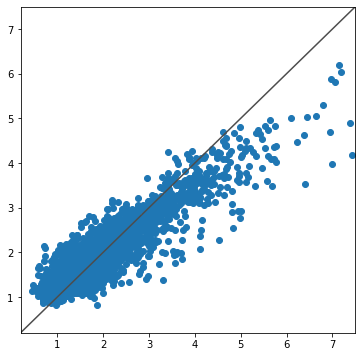

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, pred, )
ax.plot([0.2, 7.5], [0.2, 7.5], ls="-", c=".3")
ax.set(xlim=(0.2, 7.5), ylim=(0.2, 7.5))


Text(1, 6.3, 'RMSE = 0.44')

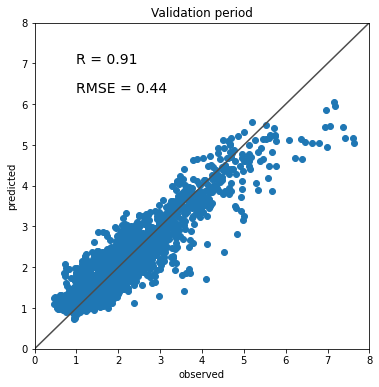

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, pred, )
ax.plot([0, 8], [0, 8], ls="-", c=".3")
ax.set(xlim=(0, 8), ylim=(0, 8))
plt.title("Validation period")
plt.xlabel("observed")
plt.ylabel("predicted")
plt.text(1,7,'R = 0.91', fontsize=14)
plt.text(1,6.3,'RMSE = 0.44', fontsize=14)